In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import linalg

In [6]:
def step_response(t, M, A, B, c):
    step_response_formula = lambda t: M * (c @ (linalg.expm(A * t) - np.eye(2)) @ linalg.inv(A) @ B)
    response = np.zeros(len(t))

    for i, val in enumerate(t):
        response[i] = step_response_formula(val)[0]

    return response

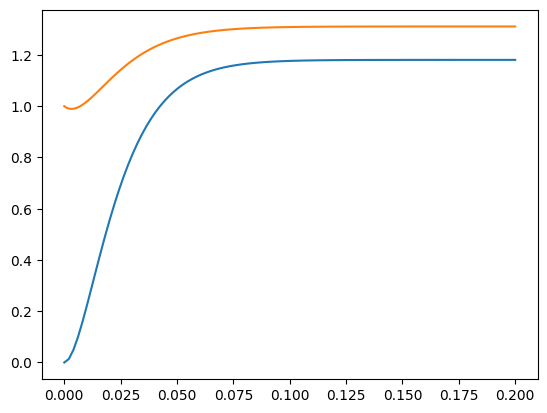

In [16]:
t_ran = np.linspace(0, 0.2, 100)

A = np.array([
    [-83, 0],
    [50, -75]
])

B = np.array([
    [21, 5.5-1.5],
    [0, -1]
])

C = np.array([0, 1])

plt.plot(t_ran, step_response(t_ran, 7, A, B, C))

def ode(t, y):
    f = y*0

    C_R_in = 5.5
    F = 28
    V = 1
    k_1 = 50
    k_2 = 54
    k_3 = 4

    C_R = y[0] 
    C_P = y[1]


    f[0] = -F/V - k_1 * C_R - k_3 * C_R**2 + F/V * C_R_in
    f[1] = -F/V * C_P - k_2 * C_P + k_1 * C_R

    return f

ode_kwargs = {
    'method': "Radau",
    'rtol': 1e-8,
    'atol': 1e-8,
}

init = [1.5, 1]

sol = solve_ivp(ode, [0, 0.2], init, **ode_kwargs)

plt.plot(sol.t, sol.y[1])

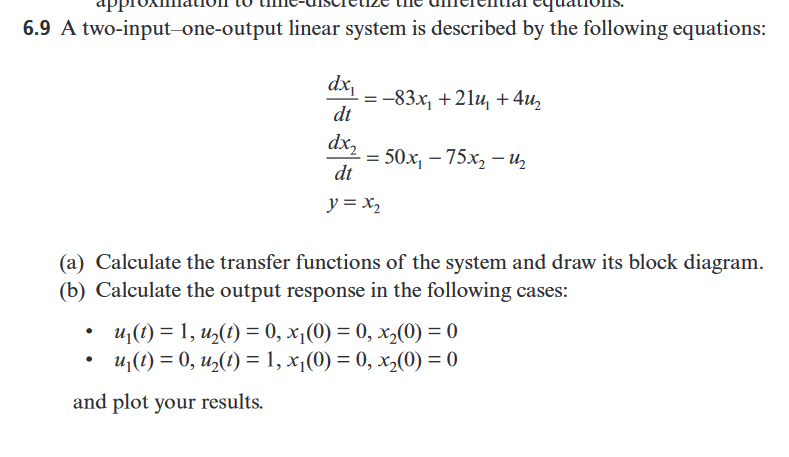

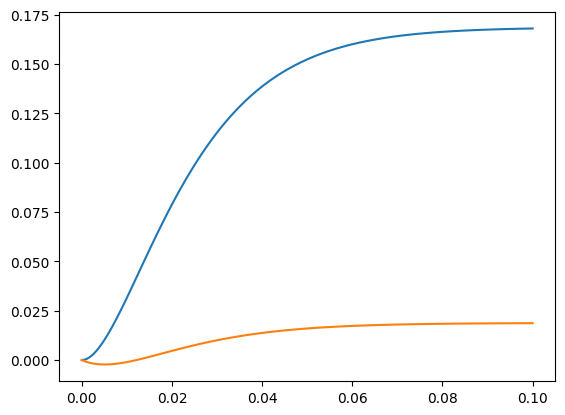

In [22]:
def ode(t, y):
    f = y*0

    x_1 = y[0]
    x_2 = y[1]

    u_1 = 1
    u_2 = 0

    f[0] = -83 * x_1 + 21 * u_1 + 4 * u_2
    f[1] = 50 * x_1 - 75 * x_2 - u_2

    return f

ode_kwargs = {
    'method': "Radau",
    'rtol': 1e-8,
    'atol': 1e-8,
}

init = [0, 0]

sol = solve_ivp(ode, [0, 0.1], init, **ode_kwargs)

plt.plot(sol.t, sol.y[1])

def ode(t, y):
    f = y*0

    x_1 = y[0]
    x_2 = y[1]

    u_1 = 0
    u_2 = 1

    f[0] = -83 * x_1 + 21 * u_1 + 4 * u_2
    f[1] = 50 * x_1 - 75 * x_2 - u_2

    return f

sol = solve_ivp(ode, [0, 0.1], init, **ode_kwargs)

plt.plot(sol.t, sol.y[1])